# Unitary Time Evolution & Geometrical representation of a qubit
**Remark:** In this  notebook $\hbar = 1$ for convenience.

In this notebook we will investigate unitary time evolution and Schrodinger equation for closed systems (system that doesn't interact with anything outside it) using numerical tools from QuTip library.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import (Qobj, basis, expect, sesolve, qeye, sigmax, sigmay, sigmaz, Bloch)

## Unitary evolution
**Fourth axiom of quantum mechanics:** "Dynamics describes how a state evolves over
time. In quantum mechanics, the time evolution of a closed system
is described by a unitary operator."[1] That is, if system at some initial time $t_0$ in state $\ket{\psi(t_0)}$, then at time $t$ the system is in state:
$\ket{\psi(t)} = U(t,t_0)\ket{\psi(t_0)}$.
Unitarity ($U^{-1} = U^{*}$ implies two physically significant properties of evolution. Time evolution is reversible in time. Indeed, If we apply conjugate of the operator to the final state we obtain initial state. $\ket{\psi(t'} = U^{*}(t,t_0)\ket{\psi(t)} = U^*U\ket{\psi(t_0)} = \ket{\psi(t_0)}$. Unitary operations also preserve probability. Let $E_n$ and $e_n$ be projectors onto the eigenstate and eigenvalues of some observable respectively, then by Born rule the probability of measuring the state $\ket{\psi(t)}$ and obtaining $e_n$ is $\|E_n\ket{\psi(t)}\|^2 = \|E_nU\ket{\psi(t_0)}\|^2 = \braket{\psi(t_0)|E^*U^*UE|\psi(t_0)} = \braket{\psi(t_0)|E^*E|\psi(t_0)} = \|E_n\ket{\psi(t_0)}\|^2$. In this proof we used the fact that observables are Hermitian operators (Second axiom [1]). 


For infinitesimal time we obtain Schrodinger equation: $\frac{\mathrm{d}\ket{\psi(t)}}{\mathrm{d}t} = -iH(t)\ket{\psi(t)}$. Where $H$ is hermitian operator called Hamiltonian and it's analogous to so called operator in classical physics. We can use Schrodinger equation as fourth axiom and then expanding it to linear order:
$\ket{\psi(t+\mathrm{d}t)} = (I_n - iH(t)\mathrm{d}t)\ket{\psi(t)}$. We define operator $U(t+\mathrm{d}t, t) = I_n - iH(t)\mathrm{d}t$, which is unitary, since $H$ is hermitian. So, unitary time evolution of closed system is generated by hermitian Hamiltonian. For time-independent Hamiltonian the unitary operator is $U(t, t_0) = e^{-i(t-t_0)H}$. Physically Hamiltonian defines the energy of the given closed system. It's eigenvalues correspond to the energy level system can be in and it's eigenstates represent the stationary states, those are states that do not change with time (only overall phase changes, which is physically irrelevante).

It turns out that general single qubit unitary evolution can be represented as $\frac{1}{2}$-spin particle rotation in 3D space. This is because Unitary matrices form group under multiplication (closed, adjoints are inverses) $SU(2)$, which is isomorphic to rotations in 3D $SU(2) \cong SO(3)$. Then we can use Pauli matrices to define the Hamiltonian for rotation around z-axis:


In [2]:
H = 0.5*sigmaz() #Defining Hamiltonian

print(H.isherm)


True


The $\frac{1}{2}$ coefficient correpsonds to real eigenvalues of spin. This can be further generalized to general rotation hamiltonian $H = \frac{1}{2}\vec{\Omega}\cdot\vec{\sigma}$, where $\vec{\Omega}$ is angular velocity vector and $\vec{\sigma} = (\sigma_x, \sigma_y, \sigma_z)$ is spin operator vector.
## Schrodinger equation
We can know use Hamiltonian defined earlier to numerically investigate time evolution of single qubit system:

<function matplotlib.pyplot.show(close=None, block=None)>

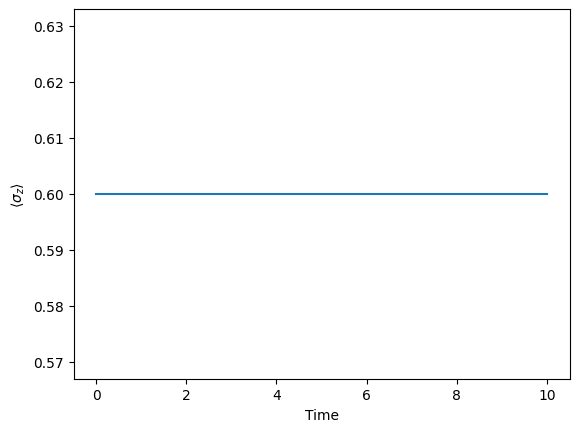

In [3]:
#Hilbert space dimension
N = 2 

#Not normalised mplitude of 0 basis vector
a = 2

#Not normalised amplitude of 1 basis vector
b = 1

#Initial state
psi0 = (a*basis(N,0) + b*basis(N,1)).unit() 

#Numerically calculating the dynamics of the qubit
tlist = np.linspace(0, 10, 100)
result = sesolve(H, psi0, tlist)

#Calculating expectation values of  spin in z  direction 
sz_vals = expect(sigmaz(), result.states)
plt.plot(tlist, sz_vals)
plt.xlabel("Time")
plt.ylabel(r'$\langle\sigma_z\rangle$')
plt.show

The graph agrees with physical intuition, as we expect rotation around z-axis to not affect the projection onto that axis. 
We can also measure the expectation on spin values on x and y axes:

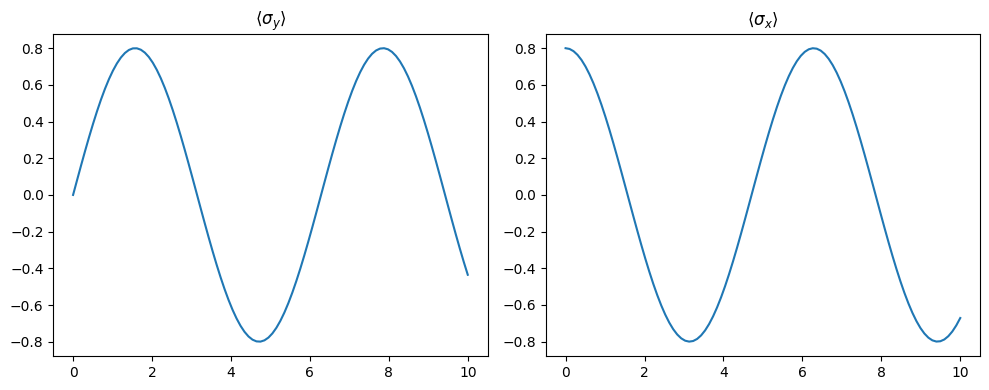

In [4]:
sy_vals = expect(sigmay(), result.states)
sx_vals = expect(sigmax(), result.states)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(tlist, sy_vals)
axes[0].set_title(r'$\langle\sigma_y\rangle$')

axes[1].plot(tlist, sx_vals)
axes[1].set_title(r'$\langle\sigma_x\rangle$')

plt.tight_layout()
plt.show()

Expectation values on $\sigma_y$ and $\sigma_x$ also align with theory, as we rotated the spin of the particle along z-axis with constant rate it's natural to obtain sinusoidal curves on y and x axes (Rotation in xy-plane with angular frequency $\Omega$).
## Geometric representation and Bloch sphere
Consider a general qubit state $\ket{\psi} = \alpha \ket{0} + \beta \ket{1}, \alpha, \beta \in \mathbb{C}$ with $|\alpha|^2+|\beta|^2 = 1$ normalisation. But then
$\frac{|\alpha|}{\alpha}\ket{\psi} = \alpha \ket{0} + \frac{|\alpha|\beta}{\alpha}\ket{1} = |\alpha|\ket{0}+|\beta|e^{i\phi}\ket{1}$.  Using normalisation and rewriting $|\alpha| = \cos(\frac{\theta}{2})$ and $|\beta| = \sin(\frac{\theta}{2})$, we obtain $\ket{\psi} = \cos(\frac{\theta}{2})\ket{0} + e^{i\theta}\sin(\frac{\theta}{2})\ket{1}$. This representation is unique except for $(0,\phi)$ and $(\pi, \phi)$, making this representation up to some global phase which is physically irrelevante. 
We can know use this representation to visualise qubit state. This visualisation is called Bloch Sphere.

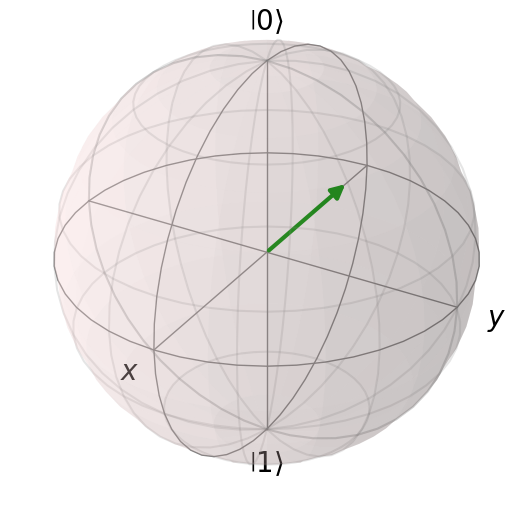

In [56]:
b = Bloch()
phi = np.pi / 3
theta = np.pi / 4
psi = np.cos(theta/2)*basis(N,0) + np.exp(1j*phi)*np.sin(theta/2)*basis(N, 1)
b.add_states(psi)
b.show()

As was mentioned before, any unitary evolution of single qubit can be represented by rotation of $\frac{1}{2}$-spin. The way we defined parameters for Bloch sphere makes $(x,y,z)$ basis axes to coincide with $(\langle\sigma_x\rangle, \langle\sigma_y\rangle, \langle\sigma_z\rangle)$. Using the earlier defined general rotation Hamiltonian $H = \frac{1}{2}\vec{\Omega}\cdot\vec{\sigma}$ and hence the generated rotation operator is $R = e^{-i\frac{\Omega}{2}\hat{n}\cdot\vec{\sigma}t}$. Where $\hat{n}$ is the direction of the axis of rotation. This expression may be also written in terms of angle of rotation: $R(\theta) = e^{-i\frac{\theta}{2}\hat{n}\cdot\vec{\sigma}}$. It's also important to notice, that 2 qubit states are orthonormal if and only if they are antipodal on Bloch sphere.

We can now use Bloch sphere to visualise the unitary evolution calculated earlier:

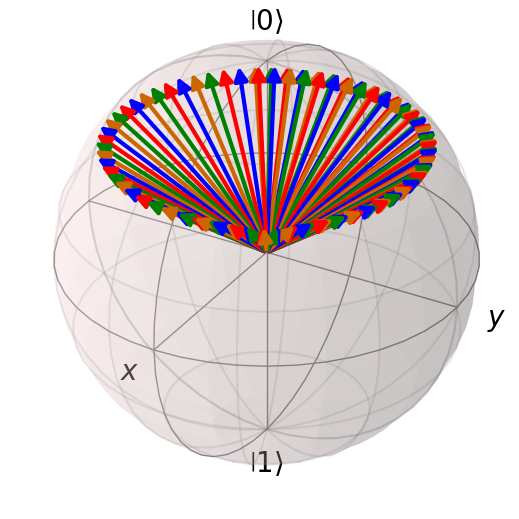

In [57]:
bl = Bloch()
bl.add_states(result.states)
bl.show()

Bloch sphere makes expectation vs time graphs visually intuitive. It is easy to see how respectful expectations change with respect to different states by simply projecting onto demanded axis. 
## Conclusion
Unitary evolution is a powerful tool that predicts dynamics of system, moreover it can be used in quantum computation to model quantum gates on single and multiple qubits. This allows us to constract quantum circuits as a sequence of unitary operators acting on qubits. Bloch sphere can be used to visualise these transformations and give some intuition. However, it is important to keep in mind the constrains of this tool, systems are considered to be closed, which isn't the case for real qubits. This constrain motivates us to look at dynamics of open systems.

## References
[1] Preskill, J. (2015). Physics 219/Computer Science 219, Quantum Computation Chapter 2. Foundations I: States and Ensembles.

[2] Slofstra W. (2022). Linear algebra and quantum probability.